# Adult income prediction

The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US
Census database.
In our first section, we explore the data at face value in order to understand the trends and
representations of certain demographics in the corpus. We then use this information in section
two to form models to predict whether an individual made more or less than $50,000 in 1994.
In the third section, we look into a couple papers written on the dataset to find out what
methods they are using to gain insight on the same data. Finally, in the fourth section, we
compare our models as well as that of others in order to find out what features are of
significance, what methods are most effective, and gain an understanding of some of the
intuition behind the numbers.

## The Dataset
The Census Income dataset has 48,842 entries. Each entry contains the following information
about an individual:
- **age :** the age of an individual
    - Integer greater than 0
    
- **workclass :** a general term to represent the employment status of an individual
    - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    
- **fnlwgt :** final weight. In other words, this is the number of people the census believesthe entry represents
    - Integer greater than 0
     
- **education :** the highest level of education achieved by an individual.
    - Bachelors, Some-college,11th, HS-grad,Prof-school,Assoc-acdm,Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
        Doctorate, 5th-6th, Preschool.
    
- **educationnum :** the highest level of education achieved in numerical form.
    - Integer greater than 0
    
- **maritalstatus :** marital status of an individual. Married-civ-spouse corresponds to acivilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
    - Married-civ-spouse,Divorced, Never-married,Separated, Widowed,Married-spouse-absent,Married-AF-spouse.
    
- **occupation :** the general type of occupation of an individual
    - Tech-support,Craft-repair,Other-service,Sales, Exec-managerial,Prof-specialty,Handler-scleaners,Machin-eop-inspct,Adm-clerical,Farming-fishing,Transport-moving,
        Priv-house-serv,Protective-serv,Armed-Forces.
    
- **relationship :** represents what this individual is relative to others. For example an individual could be a Husband. 
    Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all
    - Wife, Own-child,Husband, Not-in-family,Other-relative,Unmarried.
    
- **race :** Descriptions of an individual’s race
    - White, Asian-Pac-Islander,Amer-Indian-Eskimo,Other, Black.
    
- **sex :** the biological sex of the individual
    - Male, Female
    
- **capitalgain :** capital gains for an individual
    - Integer greater than or equal to 0
    
- **capitalloss :** capital loss for an individual
    - Integer greater than or equal to 0
    
- **hoursperweek :** the hours an individual has reported to work per week
    - continuous.
    
- **nativecountry :** country of origin for an individual
    - United-States,Cambodia, England, Puerto-Rico,Canada, Germany,Outlyin-gUS(Guam-USVI-etc), india, Japan, Greece, 
        South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, 
        France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, 
        Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    
- **income :** whether or not an individual makes more than $50,000 annually.
    - <=50k, >50k

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# Removing Warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')

In [2]:
# Loading the dataset
df= pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Exploratory Data Analysis

In [7]:
# Statistical analysis
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df.replace('?', np.nan, inplace=True)
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
# Percentage of missing values.
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [12]:
df = df.loc[df['native-country'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.00
workclass          5.74
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.76
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     0.00
income             0.00
dtype: float64

In [13]:
df = df.loc[df['occupation'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [14]:
df.shape

(45222, 15)

In [15]:
# Percentage of rows lost in data cleaning.

(48842 - len(df.index)) * 100 / 48842

7.411653904426518

**So, we have lost 7.41% of the rows from the dataframe. This is fine considering that we have more than 45,000 datapoints in the dataframe.**

In [16]:
num_attributes = df.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

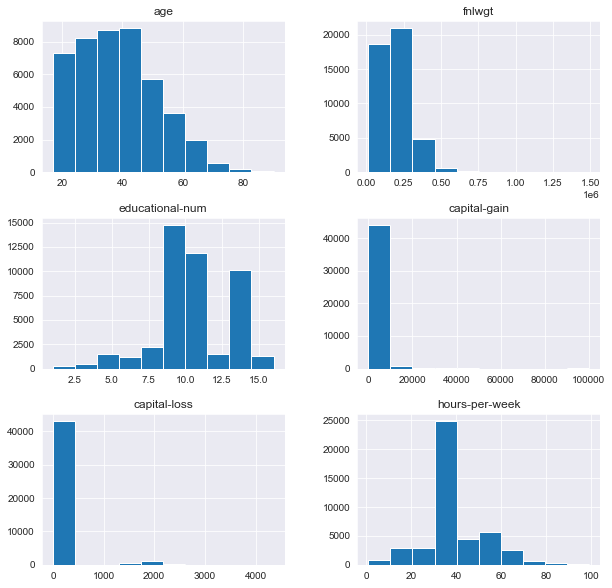

In [17]:
num_attributes.hist(figsize=(10,10))

In [18]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


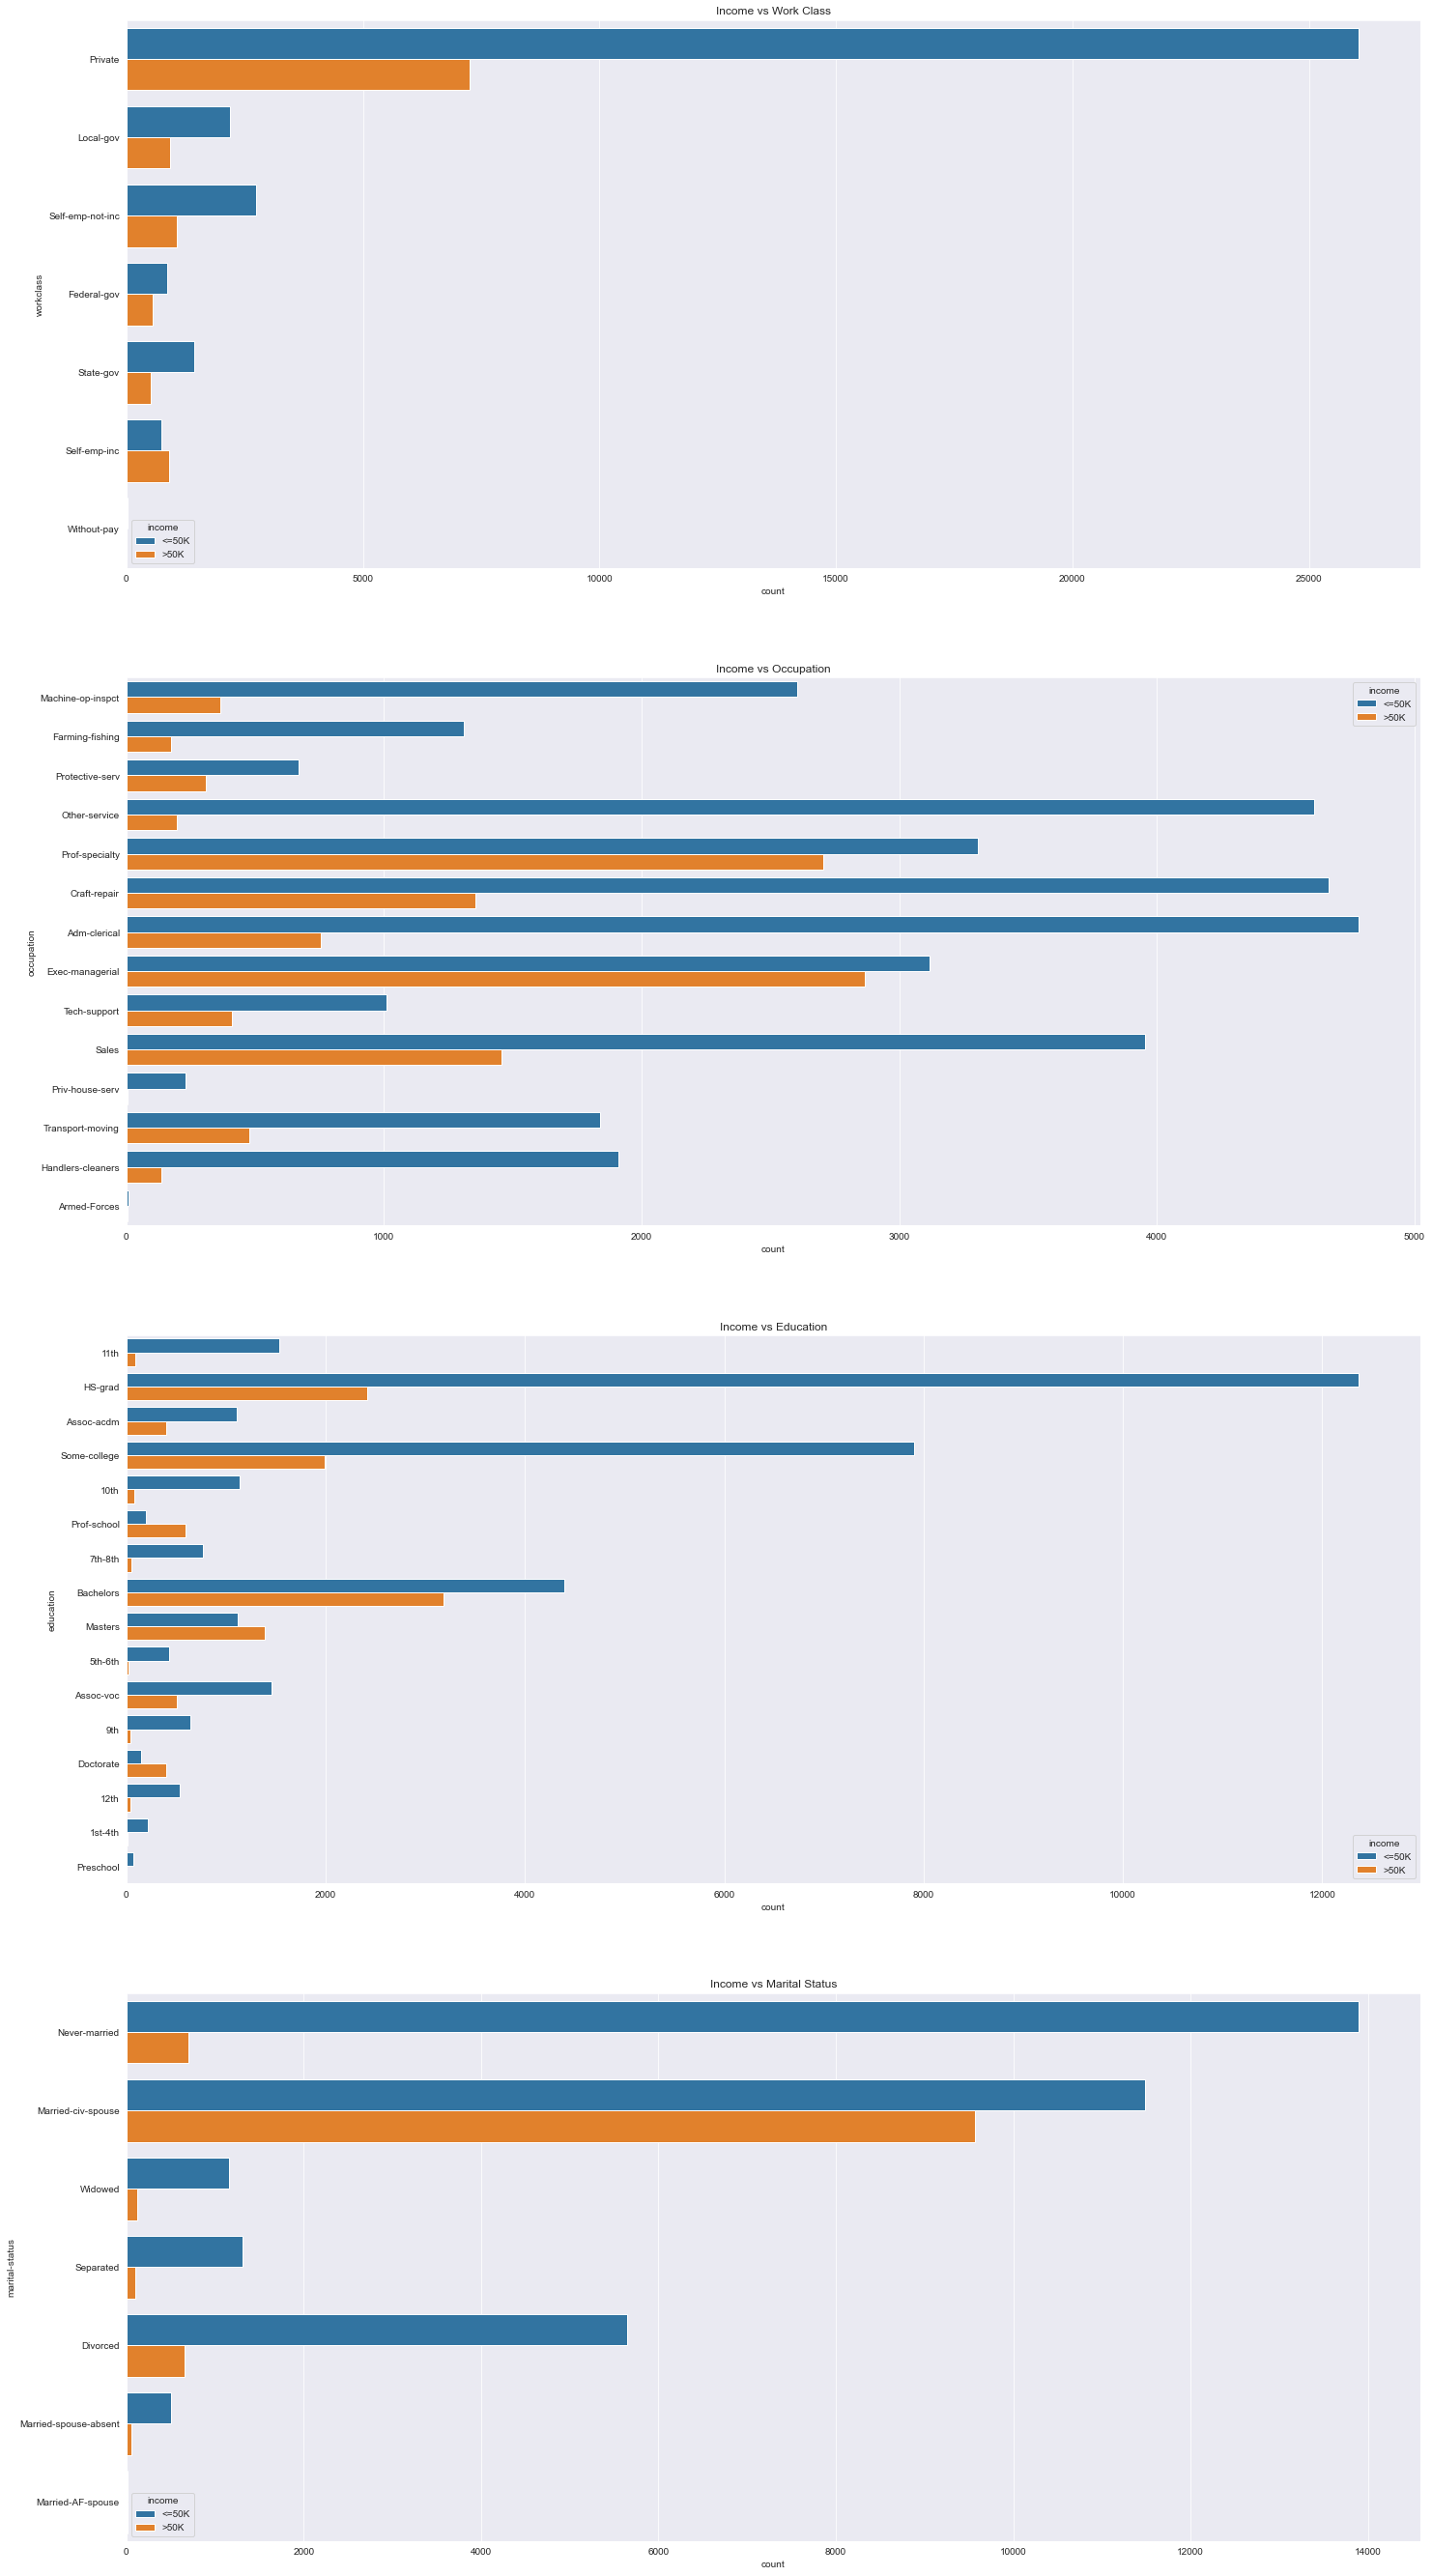

In [19]:
plt.figure(figsize=(24, 48))

plt.subplot(411)
sns.countplot(y='workclass', hue='income', data = cat_attributes)
plt.title('Income vs Work Class')

plt.subplot(412)
sns.countplot(y='occupation', hue='income', data = cat_attributes)
plt.title('Income vs Occupation')

plt.subplot(413)
sns.countplot(y='education', hue='income', data=cat_attributes)
plt.title('Income vs Education')

plt.subplot(414)
sns.countplot(y='marital-status', hue='income', data=cat_attributes)
plt.title('Income vs Marital Status')

plt.show()

In [20]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [21]:
df['income'].value_counts(normalize = True)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

In [22]:
# Percentage of working men and women

df['gender'].value_counts(normalize=True)

Male      0.675048
Female    0.324952
Name: gender, dtype: float64

In [23]:
df['income_category'] = "null"
df.loc[df['income'] == '>50K', ['income_category']] = 'high income'
df.loc[df['income'] == '<=50K', ['income_category']] = 'low income'
df.loc[:, 'income_category'].head()

0     low income
1     low income
2    high income
3    high income
5     low income
Name: income_category, dtype: object

In [24]:
# Now I am interested in looking at the racewise distribution of income.

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['income', 'race'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race                               
<=50K  Amer-Indian-Eskimo              382
       Asian-Pac-Islander              934
       Black                          3694
       Other                           308
       White                         28696
>50K   Amer-Indian-Eskimo               53
       Asian-Pac-Islander              369
       Black                           534
       Other                            45
       White                         10207

In [25]:
# Let us also look into the racewise gender distibution of income

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['income', 'race', 'gender'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race               gender                 
<=50K  Amer-Indian-Eskimo Female              152
                          Male                230
       Asian-Pac-Islander Female              371
                          Male                563
       Black              Female             1958
                          Male               1736
       Other              Female              117
                          Male                191
       White              Female            10428
                          Male              18268
>50K   Amer-Indian-Eskimo Female               14
                          Male                 39
       Asian-Pac-Islander Female               65
                          Male                304
       Black              Female              126
                          Male                408
       Other              Female                9
                          Male                 36
       White              Female             1455
                          Male               8752

**From the above table, you can see that the difference in the number of men and women earning salary above 50,000 is huge across all races. Interestingly, more black females earn a salary of USD 50,000 or less compared to black men.**

In [26]:
df.pivot_table(values=['income'], index=['workclass', 'gender'], aggfunc='count')

income
workclass        gender        
Federal-gov      Female     445
                 Male       961
Local-gov        Female    1244
                 Male      1856
Private          Female   11428
                 Male     21879
Self-emp-inc     Female     199
                 Male      1447
Self-emp-not-inc Female     617
                 Male      3179
State-gov        Female     755
                 Male      1191
Without-pay      Female       7
                 Male        14

**Private sector provides most jobs**

In [27]:
# Relationship-wise salary distribution for low income group

relationship_wise_low_income = df.loc[df['income'] == '<=50K', :].pivot_table(values=['income'], 
                                                                              index=['relationship'], aggfunc='count')
relationship_wise_low_income['percent'] = round(relationship_wise_low_income['income']
                                                * 100 / relationship_wise_low_income['income'].sum(), 2)
relationship_wise_low_income

,income,percent
relationship,,
Husband,10159,29.87
Not-in-family,10474,30.79
Other-relative,1299,3.82
Own-child,6521,19.17
Unmarried,4486,13.19
Wife,1075,3.16


In [28]:
# Relationship-wise salary distribution for high income group

relationship_wise_high_income = df.loc[df['income'] == '>50K', :].pivot_table(values=['income'], 
                                                                              index=['relationship'], aggfunc='count')
relationship_wise_high_income['percent'] = round(relationship_wise_high_income['income'] 
                                                 * 100 / relationship_wise_high_income['income'].sum(), 2)
relationship_wise_high_income

,income,percent
relationship,,
Husband,8507,75.90
Not-in-family,1228,10.96
Other-relative,50,0.45
Own-child,105,0.94
Unmarried,302,2.69
Wife,1016,9.06


**In the high income group, about 75% of people are husbands whereas in low income group, the percentage share is quite well distribted between husbands, own childs and people who are not a part of any family.**

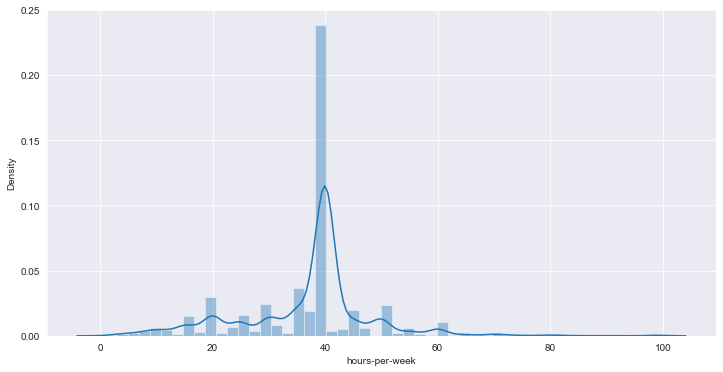

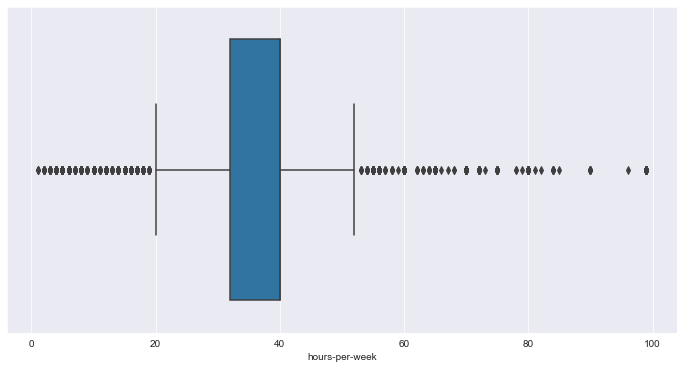

In [29]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_female = df.loc[df['gender'] == 'Female', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_female['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_female['hours-per-week'])
plt.show()

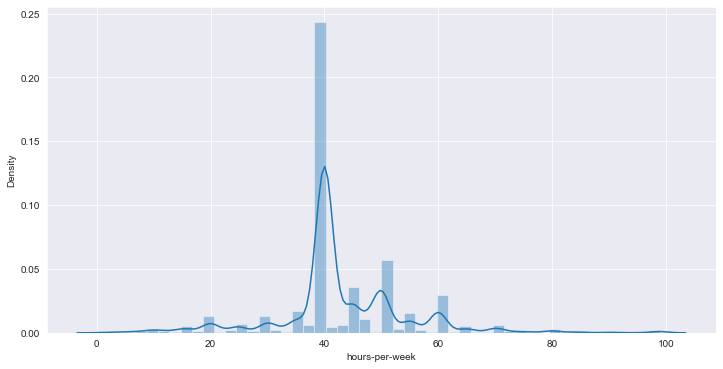

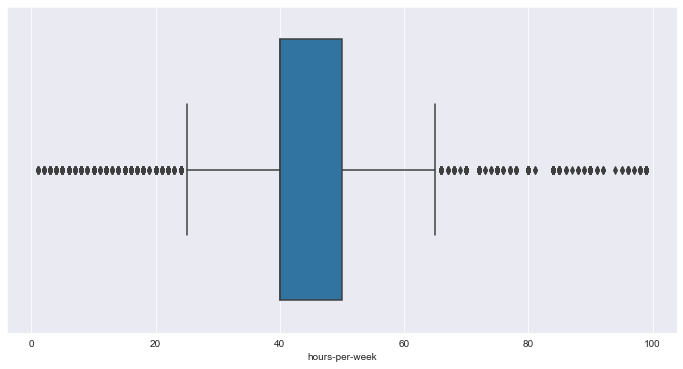

In [30]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_male = df.loc[df['gender'] == 'Male', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_male['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_male['hours-per-week'])
plt.show()

**There are lot of outliers in the 'hours-per-week' data both for males and females.**

<AxesSubplot:xlabel='income', ylabel='age'>

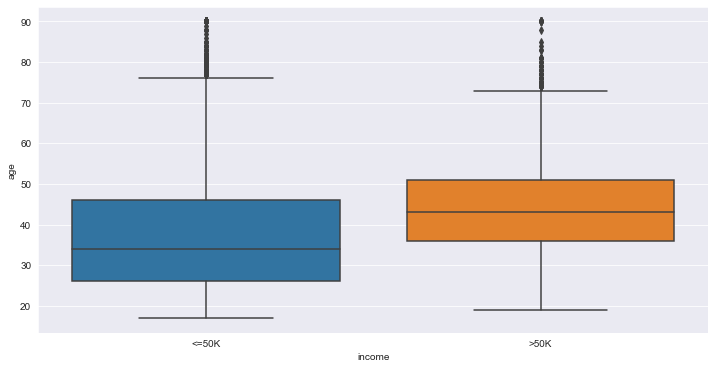

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age')

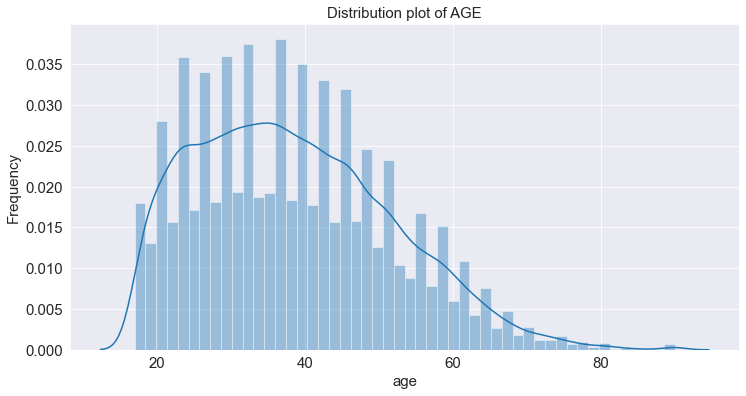

In [32]:
# Distribution plot of AGE
plt.figure(figsize=(12, 6))
sns.distplot(df['age'])
plt.xlabel('age',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution plot of AGE',fontsize=15)
plt.show()

## Data Prepration

***Removing outliers and unnecessary columns***

In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_category'],
      dtype='object')

In [34]:
print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['fnlwgt','education','capital-gain','capital-loss']
df.drop(labels = del_cols, axis = 1, inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 16
Number of columns after deleting: 12


We also opted to not use the features: **'fnlwgt','education','capital-gain','capital-loss'**. These
features either were not useful for our analysis or had too much bad data i.e. zerovalues,
unknown/private values.

### Removing outliers

In [35]:
# drop rows with age 90
print("Number of observation before removing:", df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age, axis = 0, inplace =True)
print("Number of observation after removing:", df.shape)

Number of observation before removing: (45222, 12)
Number of observation after removing: (45176, 12)


### Seperating Categorical and Numerical columns

In [36]:
df.drop('income_category', axis=1, inplace=True)

In [37]:
categorical = df.select_dtypes(include=['object'])

categorical.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [38]:
numerical = df.select_dtypes(include=['int64', 'float64'])

numerical.head()

,age,educational-num,hours-per-week
0,25,7,40
1,38,9,50
2,28,12,40
3,44,10,40
5,34,6,30


In [39]:
# scaling the numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)

df_num.head()

,age,educational-num,hours-per-week
0,0.111111,0.400000,0.397959
1,0.291667,0.533333,0.500000
2,0.152778,0.733333,0.397959
3,0.375000,0.600000,0.397959
4,0.236111,0.333333,0.295918


In [40]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
df = pd.concat([df_num, df_cat], axis=1)

df.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.111111,0.400000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.291667,0.533333,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.152778,0.733333,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.375000,0.600000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.236111,0.333333,0.295918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
X=df.drop(['income_>50K'], axis=1)
y=df['income_>50K']

In [43]:
X.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.111111,0.400000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.291667,0.533333,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.152778,0.733333,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.375000,0.600000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.236111,0.333333,0.295918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: income_>50K, dtype: float64

In [45]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31623, 78) (31623,)
(13553, 78) (13553,)


### Training the Model

In [47]:
from sklearn.linear_model import LogisticRegression

clf_logit = LogisticRegression()

clf_logit.fit(X_train, y_train)

LogisticRegression()

### Testing

In [48]:
X_test.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
21181,0.125000,0.666667,0.602041,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38734,0.152778,0.533333,0.346939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13716,0.416667,0.200000,0.479592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10871,0.500000,0.533333,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1683,0.416667,0.600000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
y_test_pred = clf_logit.predict(X_test)

### Model Evaluation

In [50]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8322880543053198

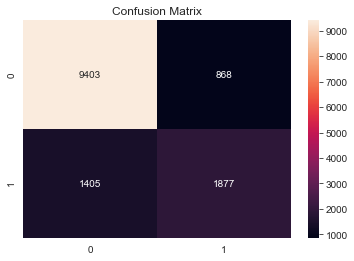

In [51]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [52]:
print(metrics.classification_report(y_test, y_test_pred))

# Number of features = 78

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     10271
         1.0       0.68      0.57      0.62      3282

    accuracy                           0.83     13553
   macro avg       0.78      0.74      0.76     13553
weighted avg       0.82      0.83      0.83     13553



In [53]:
prob = clf_logit.predict_proba(X_test)
prob = prob[:, 1]
roc_auc = metrics.roc_auc_score(y_test, prob)
print(roc_auc)

0.882636166232693


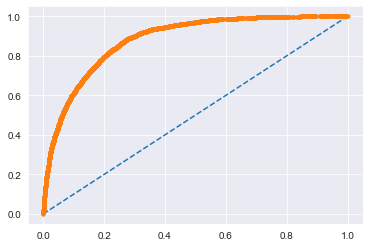

In [54]:
# ploting roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Feature Elimination using RFE

<AxesSubplot:>

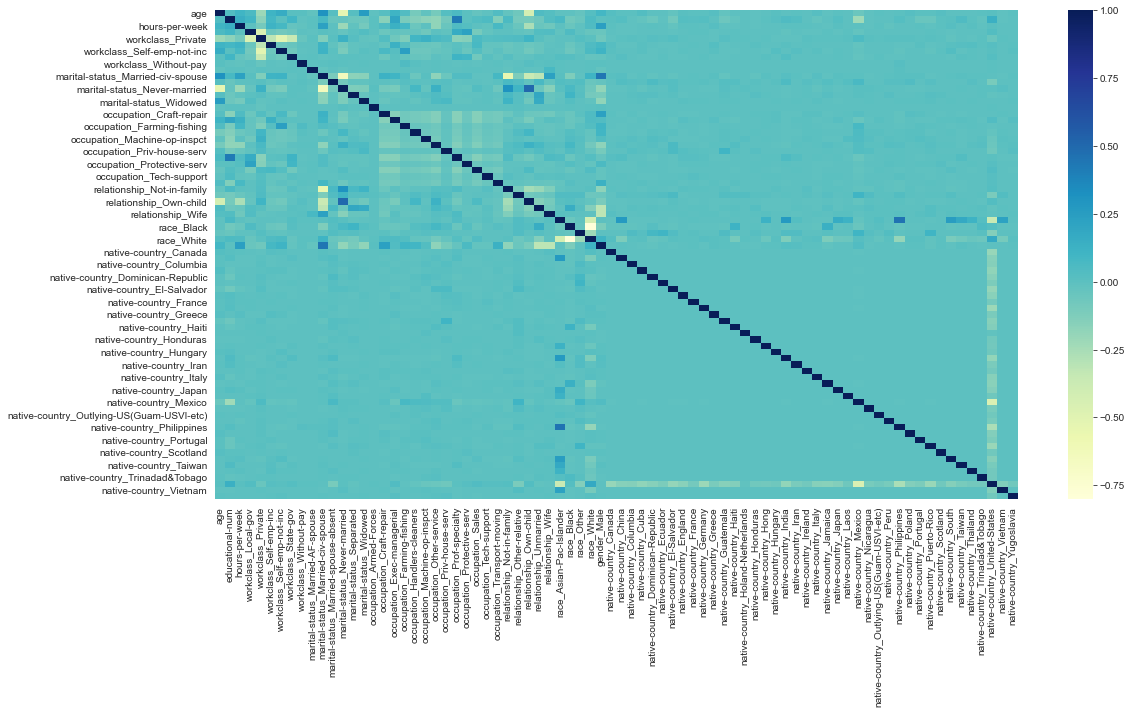

In [55]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train.corr(), cmap="YlGnBu")

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

clf_logit_rfe = LogisticRegression()

rfe = RFE(clf_logit_rfe)
rfe = rfe.fit(X_train, y_train)

In [57]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df.loc[temp_df.Included == True, :]

,Columns,Included,Ranking
0,age,True,1
1,educational-num,True,1
2,hours-per-week,True,1
6,workclass_Self-emp-not-inc,True,1
7,workclass_State-gov,True,1
8,workclass_Without-pay,True,1
9,marital-status_Married-AF-spouse,True,1
10,marital-status_Married-civ-spouse,True,1
12,marital-status_Never-married,True,1
15,occupation_Armed-Forces,True,1


In [58]:
X_train_cols = list(X_train.columns[rfe.support_])

In [59]:
len(X_train_cols)

39

In [60]:
X_train_rfe = X_train[X_train_cols]

X_train_rfe.shape

(31623, 39)

<AxesSubplot:>

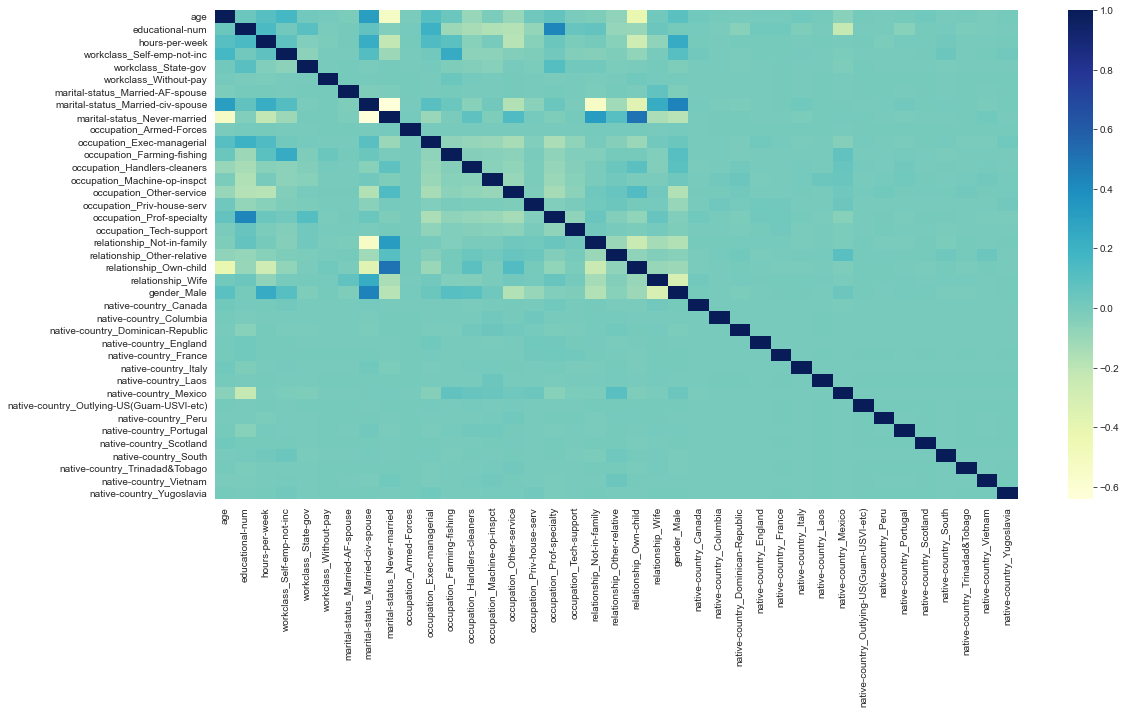

In [61]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train_rfe.corr(), cmap="YlGnBu")

In [62]:
clf_logit_rfe.fit(X_train_rfe, y_train)

LogisticRegression()

In [63]:
X_test_rfe = X_test[X_train_cols]

In [64]:
y_test_pred_rfe = clf_logit_rfe.predict(X_test_rfe)

In [65]:
metrics.accuracy_score(y_test, y_test_pred_rfe)

0.8301483066479746

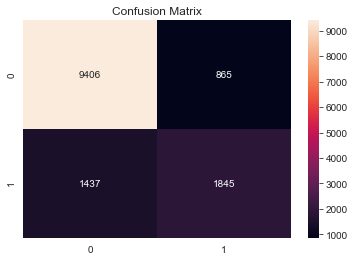

In [66]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_rfe), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [67]:
print(metrics.classification_report(y_test, y_test_pred_rfe))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     10271
         1.0       0.68      0.56      0.62      3282

    accuracy                           0.83     13553
   macro avg       0.77      0.74      0.75     13553
weighted avg       0.82      0.83      0.82     13553



In [68]:
prob_rfe = clf_logit_rfe.predict_proba(X_test_rfe)
prob_rfe = prob_rfe[:, 1]
roc_auc_rfe = metrics.roc_auc_score(y_test, prob_rfe)
print(roc_auc_rfe)

0.8814901216639075


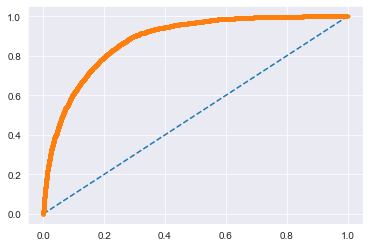

In [69]:
# ploting roc curve
fpr_rfe, tpr_rfe, thresholds_rfe = metrics.roc_curve(y_test, prob_rfe)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr_rfe, tpr_rfe, marker='.')
plt.show()

### Principal Component Analysis

In [70]:
X_train.shape

(31623, 78)

In [71]:
X_train.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
3193,0.458333,0.533333,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26832,0.236111,0.533333,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26598,0.263889,0.533333,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39225,0.305556,0.600000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35165,0.680556,0.600000,0.275510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [73]:
pca.fit(X_train)

PCA(random_state=0)

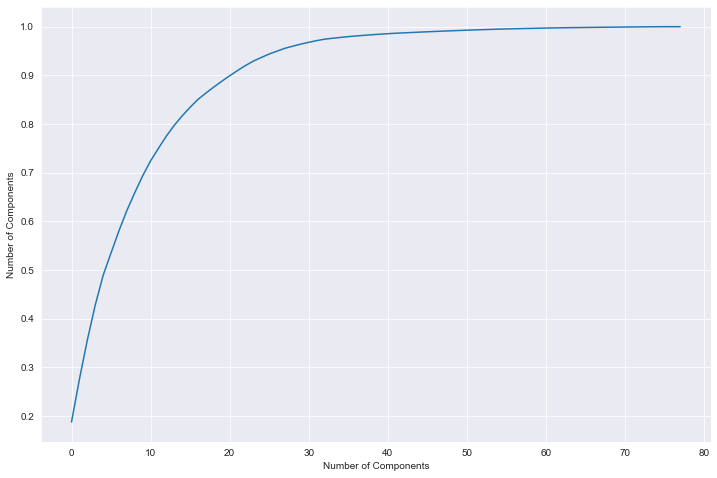

In [74]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Number of Components')
plt.show()

In [75]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18733881, 0.27532425, 0.35580775, 0.42760842, 0.48886841,
       0.5349318 , 0.58033988, 0.6220125 , 0.6586936 , 0.69336473,
       0.72416277, 0.75005694, 0.77517701, 0.79734185, 0.81673162,
       0.83431399, 0.85055724, 0.86357567, 0.87591085, 0.88770653,
       0.89903287, 0.90982008, 0.92008702, 0.92922032, 0.9366543 ,
       0.94381111, 0.94973651, 0.95563071, 0.95999597, 0.9641473 ,
       0.96782454, 0.9713208 , 0.97427323, 0.97617003, 0.97792145,
       0.97952375, 0.98095939, 0.98226234, 0.98347247, 0.98457431,
       0.98556846, 0.98651655, 0.98728824, 0.98803778, 0.9887862 ,
       0.98950448, 0.99020416, 0.99089062, 0.99156788, 0.99217599,
       0.99277863, 0.99334419, 0.9938893 , 0.99442169, 0.99489395,
       0.99531599, 0.99572136, 0.99610446, 0.99647141, 0.99682418,
       0.99716353, 0.99747358, 0.99773139, 0.99796021, 0.99818055,
       0.99839612, 0.99859903, 0.99879339, 0.99896866, 0.99913821,
       0.99930588, 0.9994682 , 0.99963029, 0.99976884, 0.99989

In [76]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 15, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [77]:
X_train_pca.shape

(31623, 15)

In [78]:
corrmat = np.corrcoef(X_train_pca.T)

<AxesSubplot:>

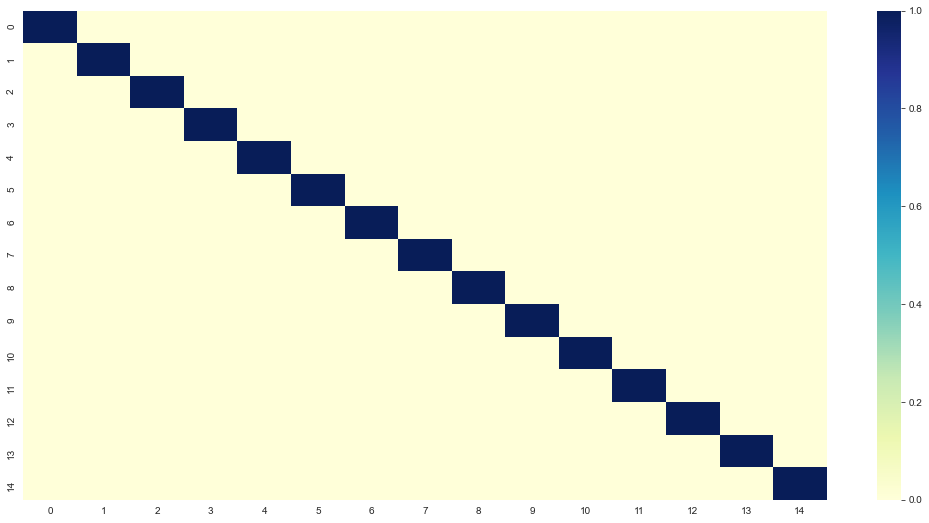

In [79]:
plt.figure(figsize=(18, 9))
sns.heatmap(corrmat, cmap="YlGnBu")

In [80]:
X_test.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
21181,0.125000,0.666667,0.602041,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38734,0.152778,0.533333,0.346939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13716,0.416667,0.200000,0.479592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10871,0.500000,0.533333,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1683,0.416667,0.600000,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
X_test_pca = pca_final.transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
clf_logit_pca = LogisticRegression()
clf_tree_pca = DecisionTreeClassifier()
clf_svm_pca = SVC(probability = True)
clf_rf_pca= RandomForestClassifier(n_estimators=100)
clf_gb_pca= GradientBoostingClassifier(n_estimators=100)
clf_bag_pca= BaggingClassifier(n_estimators=100)
clf_nb_pca= GaussianNB()
clf_sgd_pca= SGDClassifier(loss='modified_huber',shuffle=True, random_state=101)
clf_knn_pca= KNeighborsClassifier(n_neighbors=15)
clf_etc_pca= ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)

In [84]:
classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC', 'RandomForestClassifier',
               'GradientBoostingClassifier', 'BaggingClassifier', 'GaussianNB', 'SGDClassifier', 
               'KNeighborsClassifier', 'ExtraTreesClassifier' ]

In [85]:
models = {clf_logit_pca: 'LogisticRegression', 
          clf_tree_pca: 'DecisionTreeClassifier', 
          clf_svm_pca: 'SVC',
          clf_rf_pca: 'RandomForestClassifier',
          clf_gb_pca: 'GradientBoostingClassifier',
          clf_bag_pca: 'BaggingClassifier',
          clf_nb_pca: 'GaussianNaiveBayes',
          clf_sgd_pca: 'StochasticGradientDescent',
          clf_knn_pca: 'KNN',
          clf_etc_pca: 'ExtraTreesClassifier'}

In [86]:
def train(algo, name, X_train_pca, y_train, X_test_pca, y_test):
    algo.fit(X_train_pca, y_train)
    y_test_pred_pca = algo.predict(X_test_pca)
    return y_test_pred_pca


def performance(algo, name, X_test, y_test, y_test_pred_pca):
    # Accuracy Score
    score = metrics.accuracy_score(y_test, y_test_pred_pca)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_pca), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(metrics.classification_report(y_test, y_test_pred_pca))
    
    # ROC AUC Score
    prob_pca = algo.predict_proba(X_test_pca)
    prob_pca = prob_pca[:, 1]
    roc_auc_pca = metrics.roc_auc_score(y_test, prob_pca)
    print(roc_auc_pca)
    
    # Plotting ROC Curve
    fpr_pca, tpr_pca, thresholds_pca = metrics.roc_curve(y_test, prob_pca)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr_pca, tpr_pca, marker='.')
    plt.show()
    
    return roc_auc_pca


def main(models):
    auc = []
    for algo, name in models.items():
        print('#'*40, name, '#'*40)
        y_test_pred_pca = train(algo, name, X_train_pca, y_train, X_test_pca, y_test)
        roc_auc_pca = performance(algo, name, X_test, y_test, y_test_pred_pca)
        auc.append(roc_auc_pca)
    return auc

######################################## LogisticRegression ########################################
Accuracy score for LogisticRegression : 0.8137681694089869


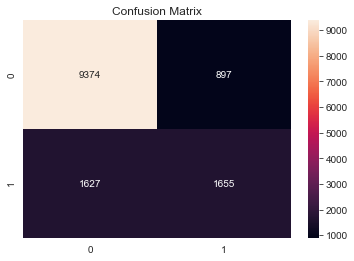

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     10271
         1.0       0.65      0.50      0.57      3282

    accuracy                           0.81     13553
   macro avg       0.75      0.71      0.72     13553
weighted avg       0.80      0.81      0.81     13553

0.8605399701009409


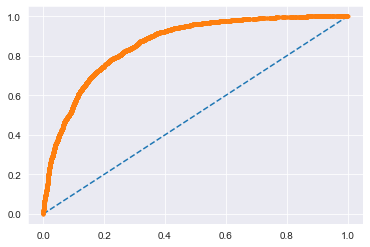

######################################## DecisionTreeClassifier ########################################
Accuracy score for DecisionTreeClassifier : 0.7788681472736664


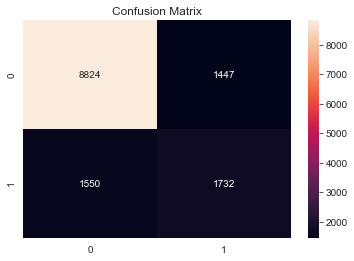

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     10271
         1.0       0.54      0.53      0.54      3282

    accuracy                           0.78     13553
   macro avg       0.70      0.69      0.70     13553
weighted avg       0.78      0.78      0.78     13553

0.7249923033388114


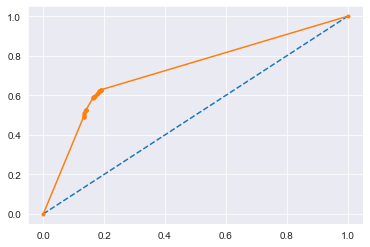

######################################## SVC ########################################
Accuracy score for SVC : 0.8149487198406257


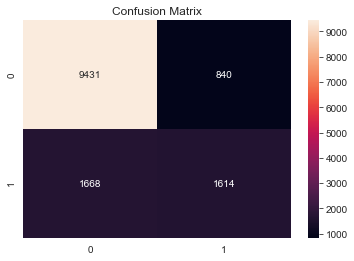

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88     10271
         1.0       0.66      0.49      0.56      3282

    accuracy                           0.81     13553
   macro avg       0.75      0.70      0.72     13553
weighted avg       0.80      0.81      0.81     13553

0.8382808818258587


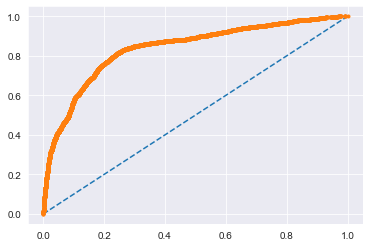

######################################## RandomForestClassifier ########################################
Accuracy score for RandomForestClassifier : 0.8108905777318675


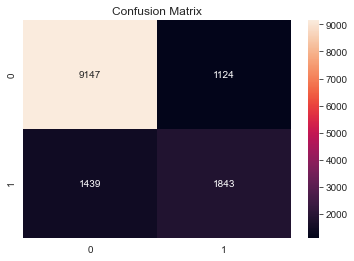

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     10271
         1.0       0.62      0.56      0.59      3282

    accuracy                           0.81     13553
   macro avg       0.74      0.73      0.73     13553
weighted avg       0.81      0.81      0.81     13553

0.8545606180966261


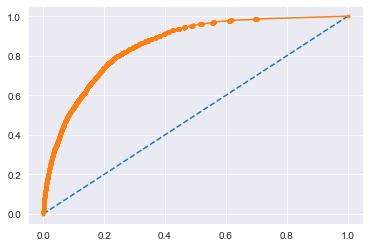

######################################## GradientBoostingClassifier ########################################
Accuracy score for GradientBoostingClassifier : 0.8267542241570132


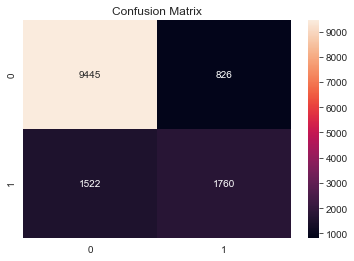

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     10271
         1.0       0.68      0.54      0.60      3282

    accuracy                           0.83     13553
   macro avg       0.77      0.73      0.74     13553
weighted avg       0.82      0.83      0.82     13553

0.8714456005801582


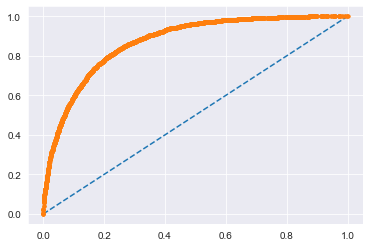

######################################## BaggingClassifier ########################################
Accuracy score for BaggingClassifier : 0.8109643621338449


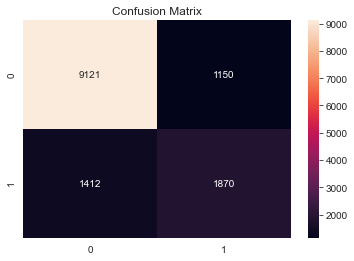

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     10271
         1.0       0.62      0.57      0.59      3282

    accuracy                           0.81     13553
   macro avg       0.74      0.73      0.74     13553
weighted avg       0.81      0.81      0.81     13553

0.8522912080782636


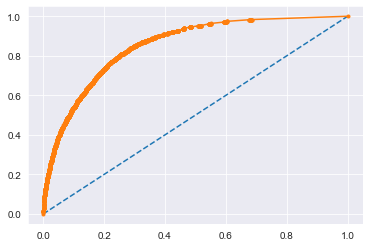

######################################## GaussianNaiveBayes ########################################
Accuracy score for GaussianNaiveBayes : 0.7666199365454143


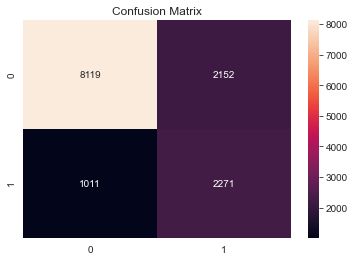

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84     10271
         1.0       0.51      0.69      0.59      3282

    accuracy                           0.77     13553
   macro avg       0.70      0.74      0.71     13553
weighted avg       0.80      0.77      0.78     13553

0.8305862378773506


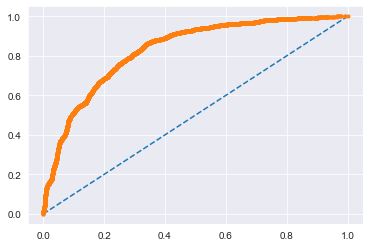

######################################## StochasticGradientDescent ########################################
Accuracy score for StochasticGradientDescent : 0.8133254629971224


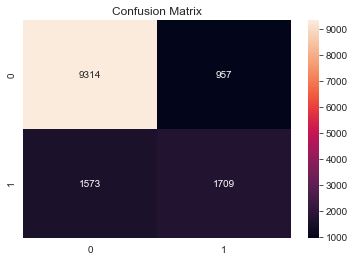

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     10271
         1.0       0.64      0.52      0.57      3282

    accuracy                           0.81     13553
   macro avg       0.75      0.71      0.73     13553
weighted avg       0.80      0.81      0.81     13553

0.8544909194823928


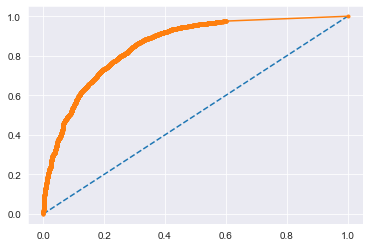

######################################## KNN ########################################
Accuracy score for KNN : 0.8217368848225485


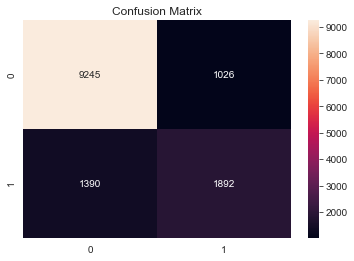

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     10271
         1.0       0.65      0.58      0.61      3282

    accuracy                           0.82     13553
   macro avg       0.76      0.74      0.75     13553
weighted avg       0.82      0.82      0.82     13553

0.8615900622680508


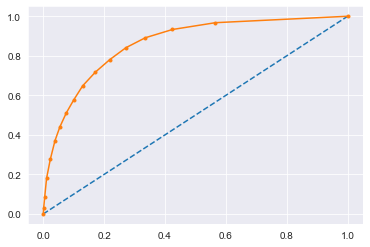

######################################## ExtraTreesClassifier ########################################
Accuracy score for ExtraTreesClassifier : 0.7948055781007894


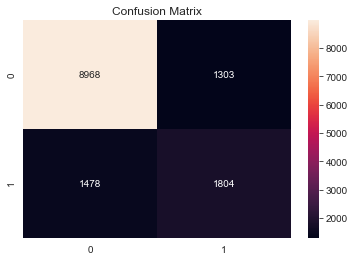

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     10271
         1.0       0.58      0.55      0.56      3282

    accuracy                           0.79     13553
   macro avg       0.72      0.71      0.72     13553
weighted avg       0.79      0.79      0.79     13553

0.8017747085666435


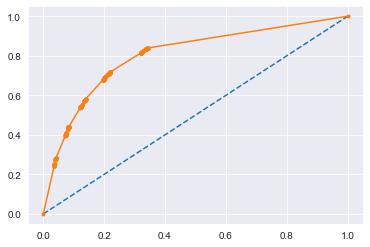

Wall time: 5min 32s


In [87]:
%%time

auc = main(models)

In [88]:
model_comp_df = pd.DataFrame(auc, columns = ['ROC AUC'], index = classifiers)

model_comp_df.sort_values(by='ROC AUC', ascending=False)

,ROC AUC
GradientBoostingClassifier,0.871446
KNeighborsClassifier,0.861590
LogisticRegression,0.860540
RandomForestClassifier,0.854561
SGDClassifier,0.854491
BaggingClassifier,0.852291
SVC,0.838281
GaussianNB,0.830586
ExtraTreesClassifier,0.801775
DecisionTreeClassifier,0.724992


## Conclusion:

From the above table we can see that Gradient Boosting Classifier algorithm has the highest accuracy.